# Solution Sketch Lab 3

## MET 2010

## NTNU Business School

## Johanens Mauritzen

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#pd.set_option('max_columns', None) # to show all columns of a pandas Data Frame

from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)



### 1.  Split-apply combine of the corona dataset

a. Group the corona dataset by day and type and generate sums of cases for each day by type.

b. Plot lines for total number of global cases by type

c. Discuss how you might interpret this data and the potential problems with interpreting the data

### Solution sketch

In [4]:
corona = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/coronavirus.csv")
corona_clean = corona.loc[(corona.province.isna()),:].copy()

corona_clean

/var/folders/q_/twndxknx06n5v1nllkjtz0km0000gn/T/ipykernel_12550/2687427661.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  corona = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/coronavirus.csv")


,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code
63858,2020-01-22,NaN,Afghanistan,33.939110,67.709953,confirmed,0,4.0,AF,AFG,4.0,Afghanistan,38928341.0,Asia,AS
63859,2020-01-23,NaN,Afghanistan,33.939110,67.709953,confirmed,0,4.0,AF,AFG,4.0,Afghanistan,38928341.0,Asia,AS
63860,2020-01-24,NaN,Afghanistan,33.939110,67.709953,confirmed,0,4.0,AF,AFG,4.0,Afghanistan,38928341.0,Asia,AS
63861,2020-01-25,NaN,Afghanistan,33.939110,67.709953,confirmed,0,4.0,AF,AFG,4.0,Afghanistan,38928341.0,Asia,AS
63862,2020-01-26,NaN,Afghanistan,33.939110,67.709953,confirmed,0,4.0,AF,AFG,4.0,Afghanistan,38928341.0,Asia,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605545,2022-01-20,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
605546,2022-01-21,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
605547,2022-01-22,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
605548,2022-01-23,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF


In [5]:
globalCases = corona_clean.groupby(["date", "type"])["cases"].sum()

In [6]:
globalCases = globalCases.reset_index()

In [7]:
globalCases

,date,type,cases
0,2020-01-22,confirmed,9
1,2020-01-22,death,0
2,2020-01-22,recovery,2
3,2020-01-23,confirmed,3
4,2020-01-23,death,0
...,...,...,...
2197,2022-01-23,death,4766
2198,2022-01-23,recovery,0
2199,2022-01-24,confirmed,3495691
2200,2022-01-24,death,8220


<AxesSubplot:xlabel='date'>

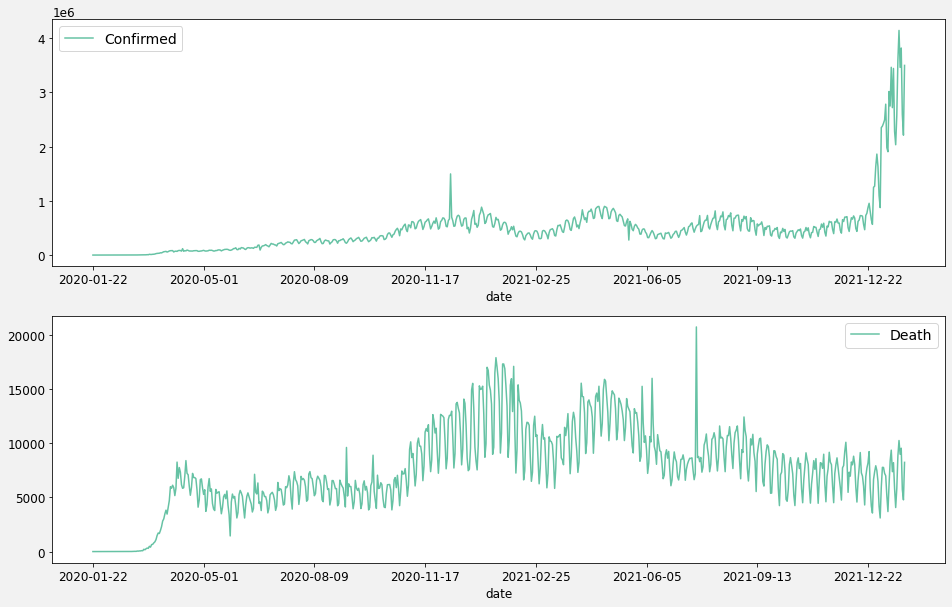

In [16]:
### Here we will plot lines in two seperate facets. I ignore the recovery category, since the data seems to be missing
fig, ax = plt.subplots(2)
globalCases.loc[globalCases.type=="confirmed"].plot(x="date", y="cases", ax=ax[0], label="Confirmed")
globalCases.loc[globalCases.type=="death"].plot(x="date", y="cases", ax=ax[1], label="Death")


A few notable observations: 

- The huge increase in cases around december 2021. This corresponds to the delta variant and a general relaxing of many public health restrictions. 

- Global deaths seemed to reach a peak late in 2020

- Again, we need to take these data with a grain of salt, because there is likely an overrepresentation from rich countries that had the resources to track infections. 

### 2. Concatenating data sets

a. Download data for prices in the Nordic electricity market for 2018 - use this url: 

http://jmaurit.github.io/anv_statistikk/data/prices2018.csv

Combine this data with the 2019-2020 data we created in the lab. Make sure to check that columns and column names combine. 

b. In a chart, compare price developments in the DK1 price area and the Oslo price area in this time frame.



In [5]:
prices2018 = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/prices2018.csv", sep=";", decimal=",")
prices2019 = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/prices2019.csv", sep=";", decimal=",")
prices2020 = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/prices2020.csv", sep=";", decimal=",")

In [6]:
prices2019

,Time,Hours,SYS,SE1,SE2,SE3,SE4,FI,DK1,DK2,...,Tr.heim,Tromsø,EE,LV,LT,AT,BE,DE-LU,FR,NL
0,01/01/2019,00 - 01,44.55,28.32,28.32,28.32,28.32,28.32,28.32,28.32,...,45.36,45.36,28.32,28.32,28.32,NaN,NaN,NaN,NaN,NaN
1,01/01/2019,01 - 02,44.07,10.07,10.07,10.07,10.07,10.07,10.07,10.07,...,45.31,45.31,10.07,10.07,10.07,NaN,NaN,NaN,NaN,NaN
2,01/01/2019,02 - 03,41.12,10.03,10.03,10.03,10.03,10.03,-4.08,-4.08,...,45.37,45.37,10.03,10.03,10.03,NaN,NaN,NaN,NaN,NaN
3,01/01/2019,03 - 04,38.88,4.56,4.56,4.56,4.56,4.56,-9.91,-9.91,...,45.21,45.21,4.56,4.56,4.56,NaN,NaN,NaN,NaN,NaN
4,01/01/2019,04 - 05,35.70,4.83,4.83,4.83,4.83,4.83,-7.41,-7.41,...,44.90,44.90,4.83,4.83,4.83,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31/12/2019,19 - 20,33.30,32.37,32.37,32.37,32.37,32.37,33.85,33.85,...,32.37,32.37,32.37,32.37,32.37,46.00,46.00,46.00,46.00,46.00
8757,31/12/2019,20 - 21,32.30,31.23,31.23,31.23,31.23,31.23,33.54,33.54,...,31.23,31.23,31.23,31.23,31.23,42.20,42.20,42.20,42.20,42.20
8758,31/12/2019,21 - 22,32.17,31.33,31.33,31.33,31.33,31.33,33.17,33.17,...,31.33,31.33,31.33,31.33,31.33,39.74,39.74,39.74,39.74,39.74
8759,31/12/2019,22 - 23,32.08,31.46,31.46,31.46,31.46,31.46,33.04,33.04,...,31.46,31.46,31.46,31.46,31.46,38.88,38.88,38.88,38.88,38.88


In [7]:
prices2019 = prices2019.rename(columns={"Time": "date"})
prices = pd.concat([prices2019,prices2020], axis=0)

In [8]:
prices2018.shape

(8761, 19)

Here we notice that there are only 19 columns, compared to 24 in the 2019 and 2020 data. So we need to limit the 2019 and 2020 columns to just the 19 in 2018. 

In [12]:
col2018 = prices2018.columns.values #copying column values from 2018 into an object

In [13]:
prices = prices.loc[:, col2018].copy() #selecting based on these column values

In [14]:
prices.shape #now it looks ok

(15817, 19)

In [15]:
prices = pd.concat([prices2018,prices], axis=0)

In [16]:
prices

,date,Hours,SYS,SE1,SE2,SE3,SE4,FI,DK1,DK2,Oslo,Kr.sand,Bergen,Molde,Tr.heim,Tromsø,EE,LV,LT
0,01/01/2018,00 - 01,26.31,26.33,26.33,26.33,26.33,26.33,21.80,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33,26.33
1,01/01/2018,01 - 02,26.43,26.43,26.43,26.43,26.43,26.43,26.43,26.43,26.43,26.43,26.43,26.43,26.43,26.43,26.43,26.43,26.43
2,01/01/2018,02 - 03,26.09,26.10,26.10,26.10,26.10,26.10,26.10,26.10,26.10,26.10,26.10,26.10,26.10,26.10,26.10,26.10,26.10
3,01/01/2018,03 - 04,24.63,24.70,24.70,24.70,24.70,24.70,24.70,24.70,24.70,24.70,24.70,24.70,24.70,24.70,24.70,24.70,24.70
4,01/01/2018,04 - 05,24.67,24.74,24.74,24.74,24.74,24.74,24.74,24.74,24.74,24.74,24.74,24.74,24.74,24.74,24.74,24.74,24.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,20/10/2020,19 - 20,21.74,28.81,28.81,34.92,43.47,64.01,37.05,43.47,19.30,19.30,19.30,17.38,17.38,12.85,64.01,64.01,64.01
7052,20/10/2020,20 - 21,20.42,25.95,25.95,25.95,25.95,29.06,25.95,25.95,19.48,19.48,19.48,17.32,17.32,12.66,29.06,29.06,29.06
7053,20/10/2020,21 - 22,19.57,20.11,20.11,20.11,20.11,23.44,20.11,20.11,19.86,19.86,19.86,17.26,17.26,12.49,23.44,23.44,23.44
7054,20/10/2020,22 - 23,19.23,19.44,19.44,19.44,19.44,23.54,19.44,19.44,19.44,19.44,19.44,17.18,17.18,12.41,23.54,23.54,23.54


<AxesSubplot:xlabel='date'>

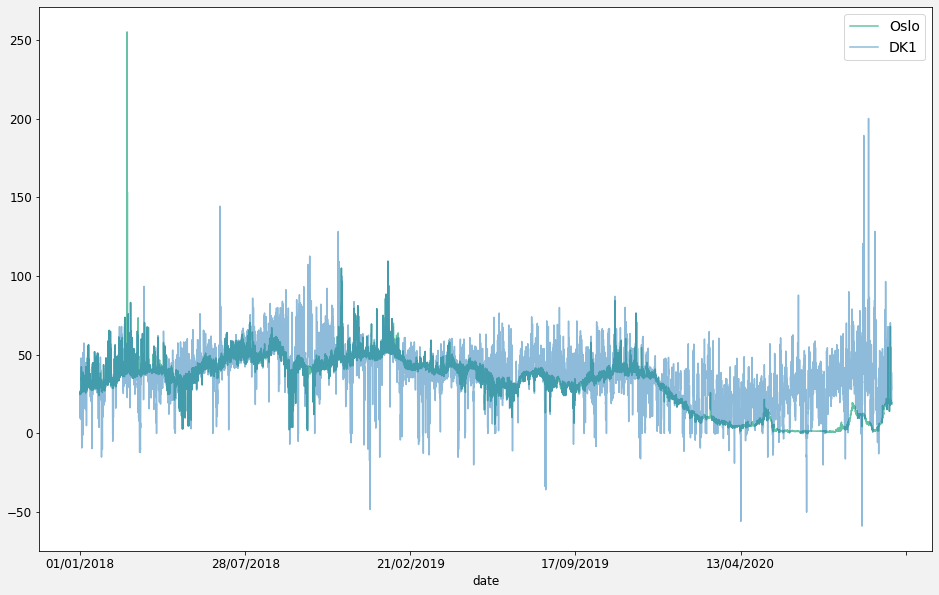

In [17]:
fig, ax = plt.subplots()
prices.plot(x="date", y="Oslo", ax=ax, alpha=1)
prices.plot(x="date", y="DK1", ax=ax, alpha=.5)

One observation here is that the level of electricity prices are not that different (except in the pandemic period), but there is much more variance in Denmark. Why? 

### 3. Merging data sets

In this exercise we will combine parts of our electricity price data with data on wind power production in Denmark. 

a. Download and combine datasets for wind power in Denmark for 2018, 2019 and 2020. Use the following URLs:

http://jmaurit.github.io/anv_statistikk/data/dkwind2018.csv

http://jmaurit.github.io/anv_statistikk/data/dkwind2019.csv

http://jmaurit.github.io/anv_statistikk/data/dkwind2020.csv

Using concatanation, combine the three files into one data frame. 

b. Now extract from the electricity price series columns for date, hour, and prices for the two danish price areas (DK1 and DK2). Merge this data frame with the data on danish wind power in the two price areas. 

c. Create a scatter plot of danish electricity prices and wind power. Can you see any correlation? What are the correlation coefficients between prices and wind power in the two areas.

### Solution sketch

In [3]:
dkwind2018 = pd.read_csv("http://jmaurit.github.io/anv_statistikk/data/dkwind2018.csv", sep=";", decimal=",")
dkwind2019 = pd.read_csv("http://jmaurit.github.io/anv_statistikk/data/dkwind2019.csv", sep=";", decimal=",")
dkwind2020 = pd.read_csv("http://jmaurit.github.io/anv_statistikk/data/dkwind2020.csv", sep=";", decimal=",")




In [4]:
dkwind = pd.concat([dkwind2018,dkwind2019,dkwind2020], axis=0)

In [43]:
dkwind.rename(columns = {'DK1':'DK1_wind', 'DK2':'DK2_wind'}, inplace = True)

In [44]:
dkwind

,date,Hours,DK1_wind,DK2_wind
0,01/01/2018,00 - 01,1729.0,649.0
1,01/01/2018,01 - 02,1763.0,613.0
2,01/01/2018,02 - 03,1508.0,663.0
3,01/01/2018,03 - 04,1514.0,723.0
4,01/01/2018,04 - 05,1523.0,713.0
...,...,...,...,...
8780,31/12/2020,19 - 20,419.0,367.0
8781,31/12/2020,20 - 21,358.0,389.0
8782,31/12/2020,21 - 22,305.0,367.0
8783,31/12/2020,22 - 23,265.0,416.0


In [46]:
dkprices = prices.loc[:, ["date", "Hours", "DK1", "DK2"]].copy()

In [47]:
dk_df = pd.merge(dkwind, dkprices, on=["date", "Hours"], how="inner")

In [48]:
fig, ax = plt.subplots(2,1)
dk_df.plot.scatter(x="")

,date,Hours,DK1_wind,DK2_wind,DK1,DK2
0,01/01/2018,00 - 01,1729.0,649.0,21.80,26.33
1,01/01/2018,01 - 02,1763.0,613.0,26.43,26.43
2,01/01/2018,02 - 03,1508.0,663.0,26.10,26.10
3,01/01/2018,03 - 04,1514.0,723.0,24.70,24.70
4,01/01/2018,04 - 05,1523.0,713.0,24.74,24.74
...,...,...,...,...,...,...
24577,20/10/2020,19 - 20,1829.0,527.0,37.05,43.47
24578,20/10/2020,20 - 21,1773.0,524.0,25.95,25.95
24579,20/10/2020,21 - 22,1658.0,503.0,20.11,20.11
24580,20/10/2020,22 - 23,1495.0,498.0,19.44,19.44


Now we need to do something about the date and hours columns. We want to create a new variable, time, which is an hourly index. (This is not strictly necessary to answer the question, but it is a good exercise anyways). 

The first step is to convert the hours

In [64]:
dk_df["hour"] = dk_df.Hours.str.slice(0,2) # take characters in index from 0 upto 2

In [65]:
dk_df["date"] = pd.to_datetime(dk_df.date)

In [66]:
dk_df["date"]

0       2018-01-01
1       2018-01-01
2       2018-01-01
3       2018-01-01
4       2018-01-01
           ...    
24577   2020-10-20
24578   2020-10-20
24579   2020-10-20
24580   2020-10-20
24581   2020-10-20
Name: date, Length: 24582, dtype: datetime64[ns]

In [67]:
dk_df["time"] = dk_df.date.astype(str).str.cat(dk_df.hour, sep="-")

In [68]:
dk_df["time"] = pd.to_datetime(dk_df.time)

Now we can plot the hourly index with one index

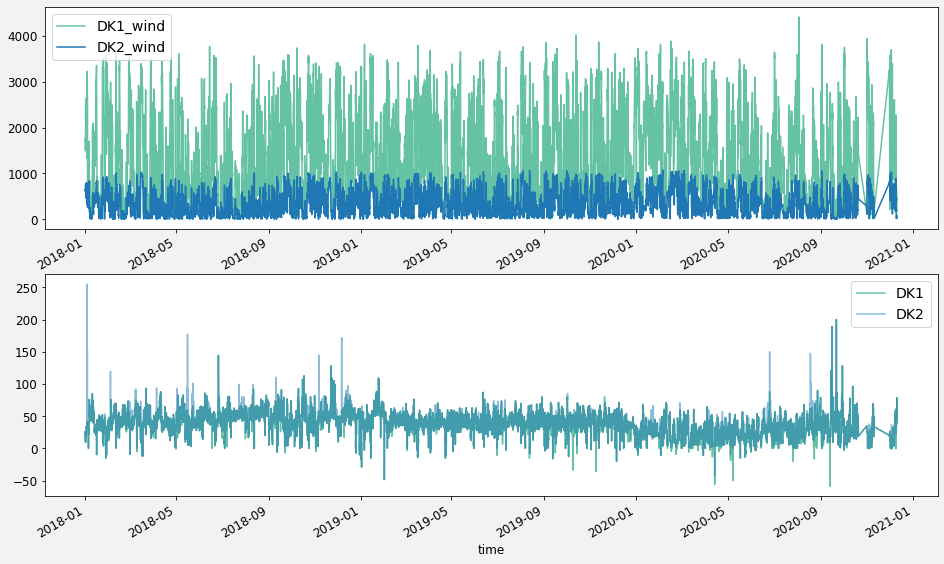

In [72]:
fig, ax = plt.subplots(2)
dk_df.plot(x="time", y="DK1_wind", ax=ax[0])
dk_df.plot(x="time", y="DK2_wind", ax=ax[0])
dk_df.plot(x="time", y="DK1", ax=ax[1])
dk_df.plot(x="time", y="DK2", ax=ax[1], alpha=.5)
plt.show()


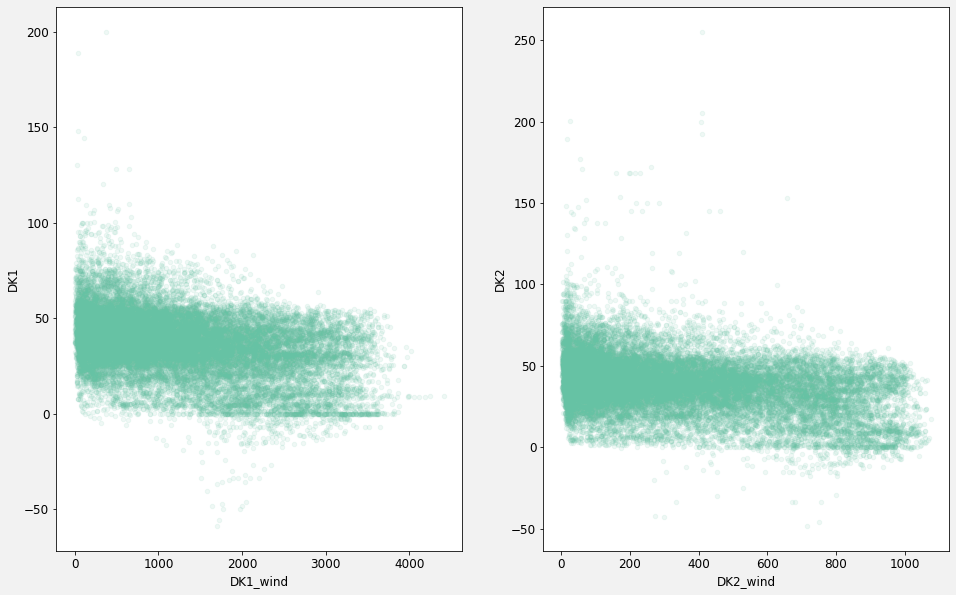

In [76]:
fig, ax = plt.subplots(1,2)
dk_df.plot.scatter(x="DK1_wind", y="DK1", ax=ax[0], alpha=.1)
dk_df.plot.scatter(x="DK2_wind", y="DK2", ax=ax[1], alpha=.1)
plt.show()

Looking at the above charts, there is a lot of variation. We can perhaps detect a slight negative trend, where higher wind power is associated with somewhat lower prices. 